# Importing Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
bill_df = pd.read_csv('../input/forbes-worlds-billionaires-list-2022/forbes_2022_billionaires.csv')
bill_df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [3]:
bill_df.shape

(2668, 22)

**The data consists of 2668 rows and 22 columns. Below we would explore the data and gain some insights on the data and consequently develop a few models**

# Exploratory Data Analysis

In [4]:
bill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [5]:
obj = []
integer = []
flt = []
for cols in bill_df:
    if bill_df[cols].dtypes == 'object':
        obj.append(cols)
    elif bill_df[cols].dtypes == 'int64':
        integer.append(cols)
    elif bill_df[cols].dtypes == 'float64':
        flt.append(cols)  
print(f'Number of object type : {len(obj)}')
print(f'Number of integer type : {len(integer)}')
print(f'Number of float type : {len(flt)}')

Number of object type : 14
Number of integer type : 3
Number of float type : 4


In [6]:
bill_df.isna().sum()

rank                       0
personName                 0
age                       86
finalWorth                 0
year                       0
month                      0
category                   0
source                     0
country                   13
state                   1920
city                      44
countryOfCitizenship       0
organization            2316
selfMade                   0
gender                    16
birthDate                 99
title                   2267
philanthropyScore       2272
residenceMsa            2029
numberOfSiblings        2541
bio                        0
about                   1106
dtype: int64

In [7]:
# gives a list of cols with null values less than 1000
df = []
for cols in bill_df:
    if bill_df[cols].isna().sum().sum() < 1000:
        df.append(cols)
print(df)

['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category', 'source', 'country', 'city', 'countryOfCitizenship', 'selfMade', 'gender', 'birthDate', 'bio']


**A few columns seem to have more than *1000* empty columns which would not help when making analysis. Therefore, we would drop those columns and work with the rest of the data.**

In [8]:
bill_df = bill_df[['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category', 'source', 'country', 'city', 'countryOfCitizenship', 'selfMade', 'gender', 'birthDate', 'bio']]
bill_df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate,bio
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Austin,United States,True,M,1971-06-28,Elon Musk is working to revolutionize transpor...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Seattle,United States,True,M,1964-01-12,Jeff Bezos founded e-commerce giant Amazon in ...
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,Paris,France,False,M,1949-03-05,Bernard Arnault oversees the LVMH empire of so...
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Medina,United States,True,M,1955-10-28,Bill Gates turned his fortune from software fi...
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Omaha,United States,True,M,1930-08-30,"Known as the ""Oracle of Omaha,"" Warren Buffett..."


Taking further look at the data, more tidying up could be done. We would be performing the following steps: 
* The country, city, year, bio and month columns would be removed as they are redundant and unnecessary
* BirthDate would be converted to a datatime column and fill with its mean
* Fill the gender column with the mode, fill the age column with the mean

In [9]:
bill_df = bill_df.drop(['bio', 'country', 'year', 'month', 'city'], axis = 1)#drops columns
bill_df.head()

,rank,personName,age,finalWorth,category,source,countryOfCitizenship,selfMade,gender,birthDate
0,1,Elon Musk,50.0,219000.0,Automotive,"Tesla, SpaceX",United States,True,M,1971-06-28
1,2,Jeff Bezos,58.0,171000.0,Technology,Amazon,United States,True,M,1964-01-12
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,LVMH,France,False,M,1949-03-05
3,4,Bill Gates,66.0,129000.0,Technology,Microsoft,United States,True,M,1955-10-28
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,Berkshire Hathaway,United States,True,M,1930-08-30


In [10]:
bill_df['birthDate'] = pd.to_datetime(bill_df['birthDate'])

In [11]:
def data_clean(df):
    """
    This function replaces null values in a column
    by the mea or mode depending on their data type.
    """
    for cols in df:
        if (df[cols].dtypes == 'object') & (df[cols].isna().sum().sum() > 0):
            df[cols].fillna(df[cols].mode(), inplace = True)
        elif (df[cols].dtypes != 'object') & (df[cols].isna().sum().sum() > 0):
            df[cols].fillna(df[cols].mean(), inplace = True)

In [12]:
data_clean(bill_df)# function call
bill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rank                  2668 non-null   int64         
 1   personName            2668 non-null   object        
 2   age                   2668 non-null   float64       
 3   finalWorth            2668 non-null   float64       
 4   category              2668 non-null   object        
 5   source                2668 non-null   object        
 6   countryOfCitizenship  2668 non-null   object        
 7   selfMade              2668 non-null   bool          
 8   gender                2652 non-null   object        
 9   birthDate             2668 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 190.3+ KB


In [13]:
bill_df = bill_df.astype({"finalWorth": 'int64', "age": 'int64', "selfMade": 'object'}) # converts data type
bill_df.head(10)

,rank,personName,age,finalWorth,category,source,countryOfCitizenship,selfMade,gender,birthDate
0,1,Elon Musk,50,219000,Automotive,"Tesla, SpaceX",United States,True,M,1971-06-28
1,2,Jeff Bezos,58,171000,Technology,Amazon,United States,True,M,1964-01-12
2,3,Bernard Arnault & family,73,158000,Fashion & Retail,LVMH,France,False,M,1949-03-05
3,4,Bill Gates,66,129000,Technology,Microsoft,United States,True,M,1955-10-28
4,5,Warren Buffett,91,118000,Finance & Investments,Berkshire Hathaway,United States,True,M,1930-08-30
5,6,Larry Page,49,111000,Technology,Google,United States,True,M,1973-03-26
6,7,Sergey Brin,48,107000,Technology,Google,United States,True,M,1973-08-21
7,8,Larry Ellison,77,106000,Technology,software,United States,True,M,1944-08-17
8,9,Steve Ballmer,66,91400,Technology,Microsoft,United States,True,M,1956-03-24
9,10,Mukesh Ambani,64,90700,Diversified,diversified,India,False,M,1957-04-19


<AxesSubplot:>

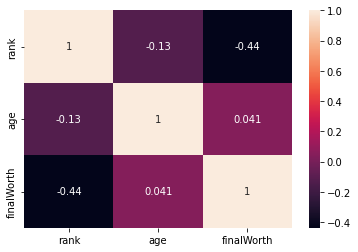

In [14]:
sns.heatmap(bill_df.corr(), annot = True)

The correlation heatmap above shows that most of the columns are highly negatively correlated.

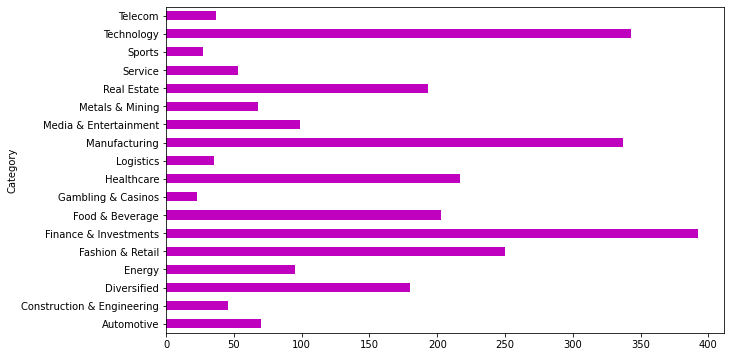

In [15]:
bill_df.groupby('category')['personName'].count().plot(kind = 'barh', ylabel = 'Count of Billionaires', xlabel = 'Category', figsize=(10,6), color = 'm')
plt.show()

The plot above, shows the top three categories with the most billionaires, ann they are:
* Finance and Investment
* Technology
* Manufacturing

In [16]:
bill_df.groupby('selfMade')['personName'].count()

selfMade
False     777
True     1891
Name: personName, dtype: int64

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

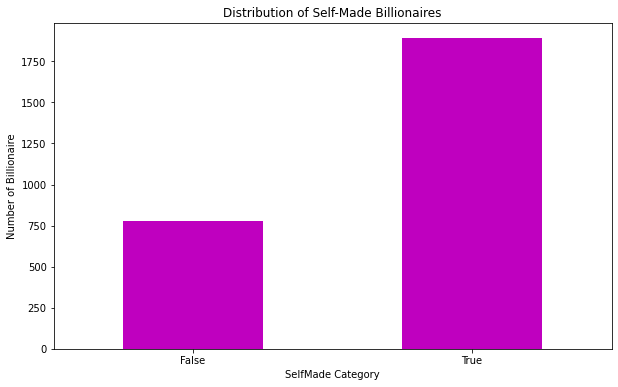

In [17]:
bill_df.groupby('selfMade')['personName'].count().plot(kind = 'bar', xlabel = 'SelfMade Category', ylabel = 'Number of Billionaire', title = 'Distribution of Self-Made Billionaires', figsize=(10,6), color = 'm')
plt.xticks(rotation =0)


Grouping billionaires into selfMade category, it is observed that a majority of them can be categorised as selfmade and less than half of that number are not. We can call this an **imbalance**.

Moving further, it would be usefull to check what perctentage of gender are or are not selfmade.

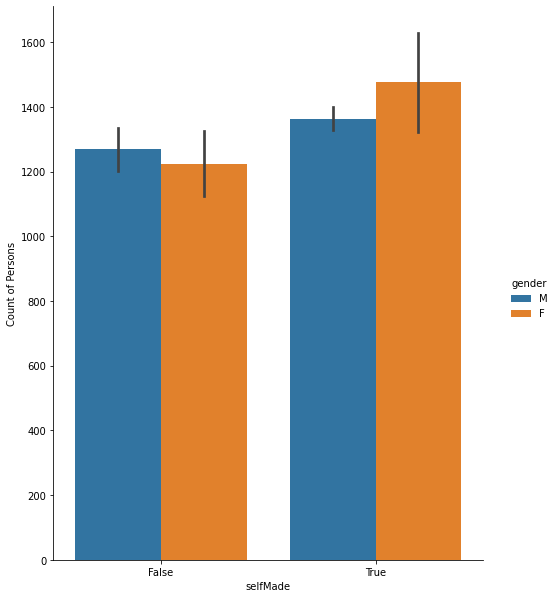

In [18]:
# bill_df['selfMade'] = np.array(bill_df['selfMade'])

g = sns.catplot(x = 'selfMade', y = bill_df.index.values, data = bill_df ,kind = 'bar', hue= 'gender')
g.fig.set_figwidth(8.27)
g.fig.set_figheight(9)
plt.ylabel('Count of Persons')
plt.show()

**What category has the richest people?**

Earlier we looked at the category with the most number of billionaires, now we want to analyse which category has billionaires with high finalWorth. To answer the above question, we would look at billionaires who are worth more than 50 billion.

In [19]:
df = bill_df.query("finalWorth >= 50000")
df.shape

(25, 10)

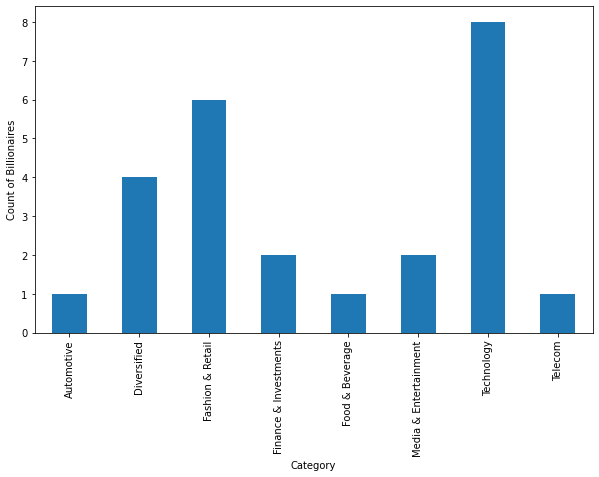

In [20]:
df.groupby('category')['personName'].count().plot(kind = 'bar', ylabel = 'Count of Billionaires', xlabel = 'Category', figsize=(10,6))
plt.show()

It can be concluded that the richer billionaires come from the **Technology industry**.